<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리
* 결정 트리

yes/no 에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘이다.
예측 과정을 이해하기쉽고 성능도 뛰어나다.

* 불순도

결정 트리가 최적의 질문을 찾기 위한 기준이다. 사이킷런은 지니 불순도와 엔트로피 불순도를 제공한다.

* 정보 이득

부모노드와 자식노드의 불순도의 차이로 결정 트리 알고리즘은 정보 이득이 최대화되도록 학습한다.

* 특성 중요도

결정 트리에 사용된 특성이 불순도를 감소하는데 기여하는 정도를 나타낸다. 
특성 중요도를 계산할 수 있는 점이 결정트리의 큰 장점이 된다. 

* info()

데이터프레임의 요약된 정보를 출력한다.
verbose=False로 지정하면 각 열에 대한 정보를 출력하지 않는다.

* describe()

데이터프레임의 열에 대한 통계값이 출력된다.
수치형일 경우 최소,최대,평균,표준편차,사분위값 등이 출력되고
문자열같은 객체타입의 열은 가장 자주 등장하는 값과 횟수가 출력된다.

* DecisionTreeClassifier

결정 트리 분류 클래스이다. 

* plot_tree()

결정 트리 모델을 시각화한다. 



In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


* 음성클래스(0)이면 레드와인 , 양성클래스(1)이면 화이트 와인

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


* info() 메서드를 사용하면 각 열의 데이터타입과 누락된 데이터가 있는지 확인하는데 유용하다.

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


* describe() 메서드를 사용하면 각 열에 대한 간략한 통계를 볼 수 있다.

In [ ]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine[['class']].to_numpy()

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

# 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8592307692307692


* 과대적합

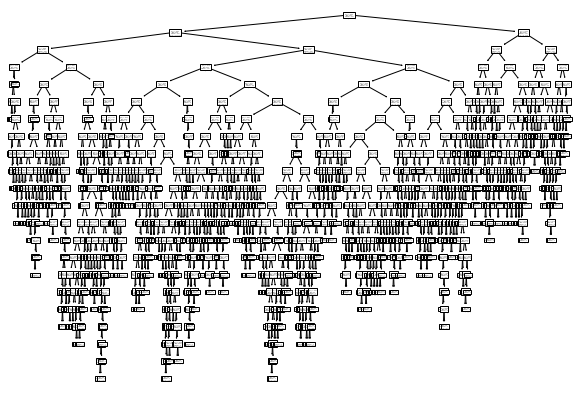

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

* 엄청난 깊이의 트리 생성
* 맨 위의 노드 - 루프 노드
* 맨 아래의 노드 - 리프 노드

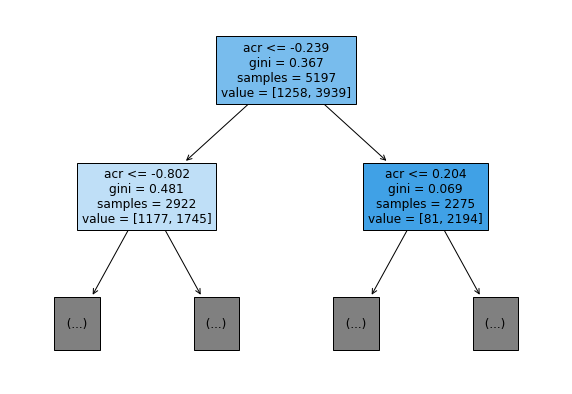

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

* 왼쪽 : yes / 오른쪽 : no
* plot_tree에서 max_depth=1 로 하나의 노드만 확장해서 그림
* feature_names를 통해 특성의 이름을 전달해서 더 잘 이해할 수 있음
* value를 통해 음성,양성 클래스의 샘플 수를 알 수 있음
* filled=True 를 통해 노드에 색깔을 칠할 수 있는데 클래스의 비율이 높아지면 노드의 색이 진해짐


# 가지치기
* 위의 결정트리는 제한없이 자라서 훈련세트에 과대 적합이 됨

In [ ]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


* 훈련세트의 성능은 낮아졌지만 테스트세트의 성능은 거의 그대로이다.

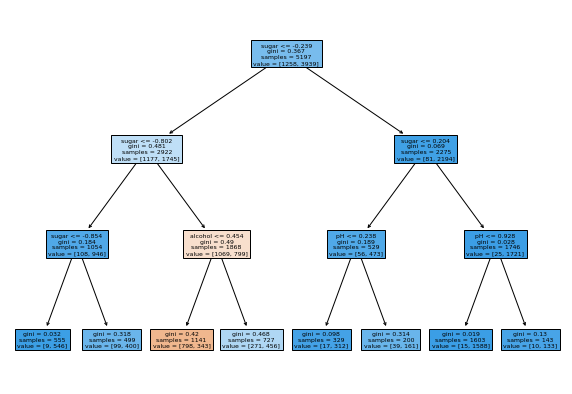

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

* 깊이는 0(루트노드)부터 3(리프노드)까지 있음
* 이때 왜 sugar<=-0.802 처럼 음수의 값이 나올까? 훈련을 시킨 데이터가 표준화되어있기때문이다. 근데 우리는 불순도를 기준으로 샘플을 나누는데 불순도는 클래스별 비율로 계산한다. 즉, 특성값을 표준화 전처리를 안해줘도 된다. 



In [ ]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8454877814123533
0.8415384615384616


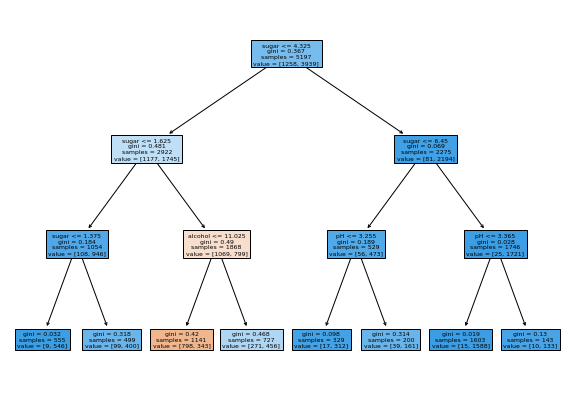

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

* 표준화를 안한 input값으로 훈련을 시켜주니 음수의 값이 사라져서 더 직관적으로 볼 수 있음
* 결정트리는 표준화 전처리를 안해줘도된다!!!

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


* 특성 중요도는 역시나 sugar가 제일 높다. 
*그래서 루프노드부터 sugar를 기준으로 나누는듯하다.